# Block 5 Exercise 2: Predicting the fare of taxi rides
Using the NY Taxi data set (see Use Case Block I) and the use case from the lecture...

In [1]:
import pandas as pd
import numpy as np
import folium


In [2]:
#check if notebook runs in colab
import sys
IN_COLAB = 'google.colab' in sys.modules
print('running in Colab:',IN_COLAB)
path='..'
if IN_COLAB:
  #in colab, we need to clone the data from the repo
  !git clone https://github.com/keuperj/DataScienceSS20.git
  path='DataScienceSS20'

running in Colab: False


In [3]:
# we load the data we have saved after wrangling and pre-processing in block I
X=pd.read_csv(path+'/DATA/train_cleaned.csv')
drop_columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','key','pickup_datetime','pickup_date','pickup_latitude_round3','pickup_longitude_round3','dropoff_latitude_round3','dropoff_longitude_round3']
X=X.drop(drop_columns,axis=1)
X=pd.get_dummies(X)# one hot coding
#generate labels
y=X['fare_amount']
X=X.drop(['fare_amount'],axis=1)

In [4]:
# a quick look at the data
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,...,pickup_borough_manhattan,pickup_borough_others,pickup_borough_queens,pickup_borough_staten_island,dropoff_borough_bronx,dropoff_borough_brooklyn,dropoff_borough_manhattan,dropoff_borough_others,dropoff_borough_queens,dropoff_borough_staten_island
0,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,...,0,0,1,0,0,0,0,0,1,0
1,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,...,1,0,0,0,0,0,1,0,0,0
2,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011,...,1,0,0,0,0,0,1,0,0,0
3,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012,...,1,0,0,0,0,0,1,0,0,0
4,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,...,1,0,0,0,0,0,1,0,0,0


In [5]:
y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

### E 2.1 Split data into train and test data
* use data from 2009-1014 for training and 2015 for evaluation


In [9]:
X_train=X[X['pickup_year']<2015]
y_train=y[X['pickup_year']<2015]
X_test=X[X['pickup_year']>=2015]
y_test=y[X['pickup_year']>=2015]

X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

### E 2.2 Train a Random Forest Regression Model
* train model using [RF regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
* optimize the model parameters (#trees, depth, vars per split, ...) and evaluate the [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) on train and test data
* Analyze the model error: are there typical settings where the model fails?

In [12]:
from sklearn.ensemble import *
from sklearn.metrics import *

rf=RandomForestRegressor(n_jobs=-1, n_estimators=100)
rf.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [15]:
mean_squared_error(y_test,rf.predict(X_test))

21.365253356528147

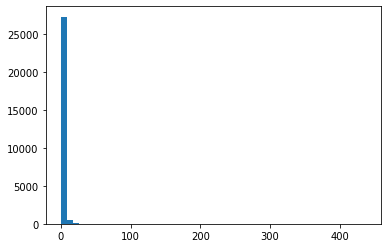

In [21]:
import matplotlib.pyplot as plt

dif = np.abs(y_test - rf.predict(X_test))
t=plt.hist(dif,bins=50)

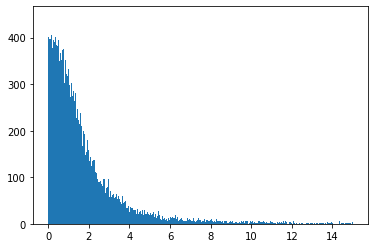

In [29]:
dif_zoom = dif[dif<15]
t=plt.hist(dif_zoom,bins=500)